In [1]:
# General definitions
%run '../definitions.ipynb'
%run '../treemakers/treemakers.py'
%run '../Analysis_class.ipynb'

In [2]:
processed_data_path = '/data/xenon/xams/run8/processed_v2_medium/'
minitree_path = '/data/xenon/xams/run8/minitrees/'

In [3]:
run_names_ambe = get_run_list(processed_data_path, '170324_164827', '170324_164827') # Last file: 170322_081037


Run list contains 1 files


In [4]:
treemakers = ['Fundamentals', ZeroFieldProperties]

In [5]:
ambe = XAMSAnalysis(run_names_ambe, processed_data_path, minitree_path)

In [6]:
ambe.load(treemakers = treemakers, compute_properties=False)

INFO:hax.__init__] Not looking for datasets in runs, db since you put use_runs_db = False
DEBUG:hax.minitrees] Found minitree at /data/xenon/xams/run8/minitrees/170324_164827_Fundamentals.root
DEBUG:hax.minitrees] Found minitree at /data/xenon/xams/run8/minitrees/170324_164827_ZeroFieldProperties.root
DEBUG:hax.minitrees] Found minitree at /data/xenon/xams/run8/minitrees/170324_164827_Fundamentals.root
DEBUG:hax.minitrees] Found minitree at /data/xenon/xams/run8/minitrees/170324_164827_ZeroFieldProperties.root
DEBUG:hax.minitrees] Removing weird index column


Loaded 249208 (249.2 k) events.
Total live time: 1800.4 seconds (0.5 hours)


In [7]:
ambe.d.keys()

Index(['run_number', 'event_number', 'largest_other_s1', 'n_s1s', 's1_area',
       's1_area_fraction_top', 's1_area_midpoint', 's1_center_time',
       's1_height', 's1_left', 's1_n_saturated_channels', 's1_range_20p_area',
       's1_range_50p_area', 's1_range_80p_area', 's1_right',
       's1_time_from_midpoint_10p', 's1_time_from_midpoint_20p',
       's1_time_from_midpoint_30p', 's1_time_from_midpoint_40p',
       'event_duration', 'event_time', 't', 'ms_since_previous_event'],
      dtype='object')

ms_since_previous_event above 1.0 selection: 119471 rows removed (52.06% passed)


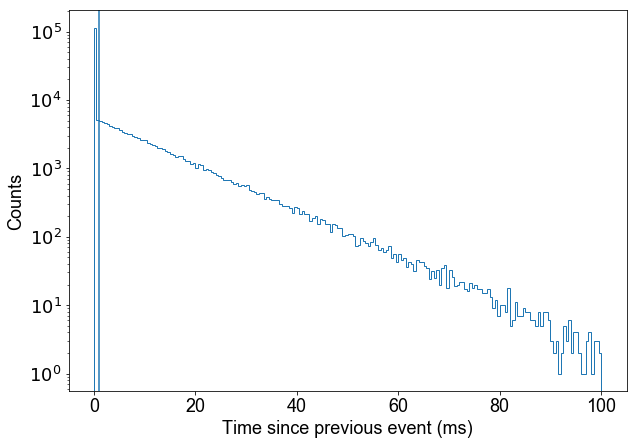

In [12]:
ambe.cut_time_since_previous(apply=True, plot=True, bins=200, histtype='step', range=(0, 100))
plt.yscale('log')

/home/erik/anaconda3/envs/pax_new/lib/python3.4/site-packages/numpy/lib/function_base.py:583: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/home/erik/anaconda3/envs/pax_new/lib/python3.4/site-packages/numpy/lib/function_base.py:584: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


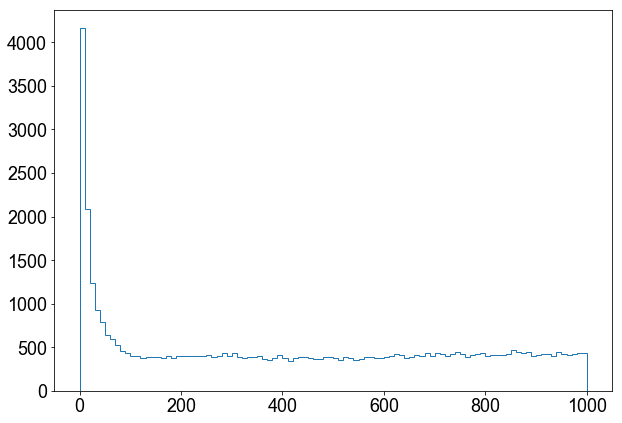

In [13]:
plt.hist(ambe.d['s1_area'], bins=100, histtype='step', range=(0, 1000))
plt.show()

In [14]:
ambe.d.keys()

Index(['run_number', 'event_number', 'largest_other_s1', 'n_s1s', 's1_area',
       's1_area_fraction_top', 's1_area_midpoint', 's1_center_time',
       's1_height', 's1_left', 's1_n_saturated_channels', 's1_range_20p_area',
       's1_range_50p_area', 's1_range_80p_area', 's1_right',
       's1_time_from_midpoint_10p', 's1_time_from_midpoint_20p',
       's1_time_from_midpoint_30p', 's1_time_from_midpoint_40p',
       'event_duration', 'event_time', 't', 'ms_since_previous_event'],
      dtype='object')

In [15]:
ambe.d = ambe.d[ambe.d['n_s1s'] > 0]

In [16]:
ambe.d = cuts.below(ambe.d, 'n_s1s', 2)

n_s1s below 2 selection: 1712 rows removed (98.68% passed)


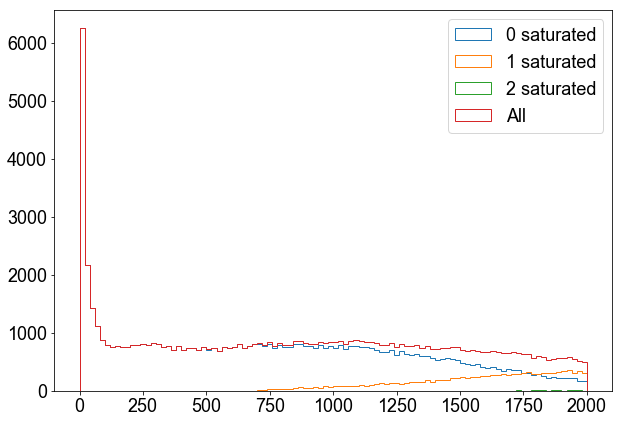

In [18]:
ran = (0, 2000)
for nsat in [0, 1, 2]:
    sel = ambe.d['s1_n_saturated_channels'] == nsat
    plt.hist(ambe.d['s1_area'][sel], bins=100, histtype='step', label='%d saturated' % nsat, range=ran)
plt.hist(ambe.d['s1_area'], bins=100, histtype='step', label='All', range=ran)
plt.legend()

plt.show()

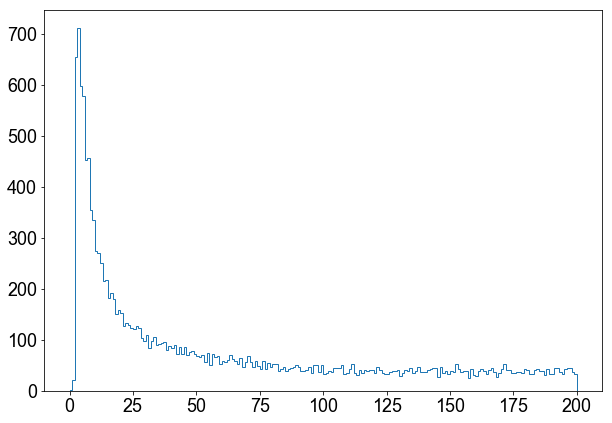

In [19]:
plt.hist(ambe.d['s1_area'], bins=200, histtype='step', label='All', range=(0, 200))
plt.show()

In [20]:
ambe.d = cuts.below(ambe.d, 's1_area', 500)

s1_area below 500 selection: 100479 rows removed (21.27% passed)


In [21]:
ambe.len()

27143

In [43]:
ambe.add_s1_waveforms(zerofield=True, verbose=True)

DEBUG:hax.minitrees] Minitree 170324_164827_S1PulseZeroField.root not found
DEBUG:hax.minitrees] Minitree found in non-preferred format: 170324_164827_S1PulseZeroField.pklz
DEBUG:hax.minitrees] Found minitree at /data/xenon/xams/run8/minitrees/170324_164827_S1PulseZeroField.pklz


170324_164827


DEBUG:hax.minitrees] Minitree 170324_164827_S1PulseZeroField.root not found
DEBUG:hax.minitrees] Minitree found in non-preferred format: 170324_164827_S1PulseZeroField.pklz
DEBUG:hax.minitrees] Found minitree at /data/xenon/xams/run8/minitrees/170324_164827_S1PulseZeroField.pklz
/home/erik/anaconda3/envs/pax_new/lib/python3.4/site-packages/ipykernel/__main__.py:153: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->['s1_pulse']]



In [27]:
ambe.d

,run_number,event_number,largest_other_s1,n_s1s,s1_area,s1_area_fraction_top,s1_area_midpoint,s1_center_time,s1_height,s1_left,...,s1_right,s1_time_from_midpoint_10p,s1_time_from_midpoint_20p,s1_time_from_midpoint_30p,s1_time_from_midpoint_40p,event_duration,event_time,t,ms_since_previous_event,s1_pulse
14,0,14,0.0,1,7.698151,0.268536,251.012039,255.700104,0.842358,107.0,...,149.0,-12.587788,-7.747938,-4.436027,-2.533525,1280,1490374107050862776,0.048666,44.739616,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
15,0,15,0.0,1,318.798737,0.596725,271.687958,279.853851,19.835470,115.0,...,243.0,-14.638885,-11.405083,-7.977683,-4.291905,1280,1490374107061002280,0.058805,10.139504,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
22,0,22,0.0,1,368.698944,0.444460,276.622955,285.472900,18.802460,114.0,...,225.0,-18.130222,-13.827013,-9.683419,-4.909339,1280,1490374107104307512,0.102111,14.766496,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
47,0,47,0.0,1,107.363403,0.967947,258.939209,269.024414,10.955620,111.0,...,200.0,-12.495604,-10.469504,-7.862191,-3.844921,1280,1490374107242894312,0.240697,1.551696,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
51,0,51,0.0,1,158.716461,0.396393,285.372040,293.400360,7.154575,115.0,...,296.0,-24.729897,-20.186276,-13.832722,-5.653943,1280,1490374107286981544,0.284785,2.130096,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
59,0,59,0.0,1,19.531315,0.849229,252.958298,261.345764,1.585286,108.0,...,170.0,-12.460556,-9.860398,-6.091036,-2.843417,1280,1490374107337810072,0.335613,1.135056,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
69,0,69,0.0,1,3.127921,0.616856,255.399002,255.653641,0.588963,115.0,...,141.0,-4.734058,-3.223575,-2.161396,-1.091064,1280,1490374107365985672,0.363789,12.468208,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
71,0,71,0.0,1,5.071739,0.608978,248.661484,249.236435,1.137902,111.0,...,139.0,-4.008602,-2.945396,-2.008103,-1.116684,1280,1490374107395574936,0.393378,1.877744,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
78,0,78,0.0,1,36.649342,0.070757,268.497711,277.016693,1.936167,111.0,...,194.0,-20.333533,-15.524315,-10.199607,-4.712068,1280,1490374107452704056,0.450507,3.506928,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
82,0,82,0.0,1,200.496323,0.494854,270.246338,279.757294,15.478407,114.0,...,315.0,-14.677163,-12.017091,-8.992591,-5.010371,1280,1490374107474075528,0.471879,2.893616,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [29]:
ambe.d['s1'] = ambe.d['s1_area']

In [30]:
ambe.add_percentiles()

In [37]:
def build_pulse_hist_entries(d, alignment_field):
    '''
    Align the S1 pulses. This assumes 400 ns of data and a field (`alignment_field`) that is given in units of 
    time since start of waveform in ns. This is put at the zero point, which is 100 ns in the waveform.
    The function returns two arrays, one containing the time points (shifted by the alignment field) and 
    one containing the weight, so that lower-than 1 bin sampling and alignment is possible.
    '''
    time_edges = np.linspace(-100, 300, 201)
    # Arbitrarily put the first sample EXACTLY at zero rather than at bin edges
    time = time_edges[:-1]
    time_entries = []
    weight_entries = []
    
    for i, ev in d.iterrows():
        time_entries.append(time + 100 - ev[alignment_field])
        weight_entries.append(np.array(ev['s1_pulse']) / ev['s1'])
    
    return np.concatenate(time_entries), np.concatenate(weight_entries)

def compute_average_pulse(d, alignment_field, dt = 2):
    '''
    Compute the average pulse, calling the underlying `build_pulse_hist_entries` routine. 
    This assumes 400 ns of data and a field (`alignment_field`) that is given in units of 
    time since start of waveform in ns. This is put at the zero point, which is 100 ns in the waveform.
    dt is sample time in ns, which may be lower than the raw sample of 2 ns. Go ahead and try!
    '''
    n_bins_time = np.floor(400 / dt) + 1
    if 400 % dt:
        print('Warning: please use a divisor of 400 for your time bins (i.e. 1, 0.2, 200, ...) .')
    time_edges = np.linspace(-100, 300, n_bins_time)
    times, weights = build_pulse_hist_entries(d, alignment_field)
    
    # This takes only the left bin edges, so that the first sample is zero.
    time = time_edges[:-1]
    amplitude, _ = np.histogram(times, bins=time_edges, weights=weights)
    # Normalization
    amplitude = amplitude / len(d) / dt
    
    return time, amplitude

def plot_average_pulse_in_slice(d, alignment_field, slice_field = 'cs1', dt = 2, slice_range=(0, np.inf), **kwargs):
    sel = (d[slice_field] >= slice_range[0]) & (d[slice_field] < slice_range[1])
    time, average_pulse = compute_average_pulse(d[sel], alignment_field, dt)
    plt.plot(time, average_pulse, **kwargs)
    plt.xlabel('Time (ns)')
    plt.ylabel('Average pulse ((%d ns)$^{-1}$)' % dt)
    return 

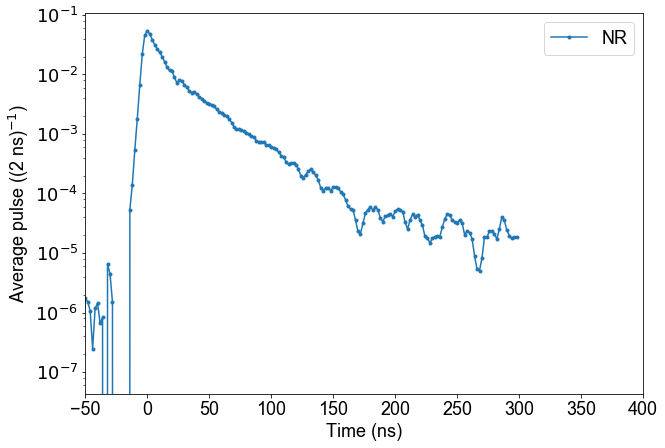

In [42]:
plot_average_pulse_in_slice(ambe.d, 's1_10_percentile_point', dt=2, slice_field = 's1',
                            slice_range=(10, 20), label='NR', marker='.')
# plot_average_pulse_in_slice(er_ersel.d, 's1_10_percentile_point', dt=2, cs1_range=(30, 40), label='ER', marker='.')

plt.xlim(-50, 400)
plt.legend()
plt.yscale('log')
plt.show()